# A very, very short introduction to Keras

## 1. The Iris example

Let's start with a example of neural network for classification.  We'll use the `iris` dataset, which is a well-known dataset in statistics (first used by Fisher in 1936 in his paper _The use of multiple measurements in taxonomic problems_). The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [7]:
import seaborn
iris = seaborn.load_dataset("iris")

Let's look at some samples:

In [103]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width     species
36            5.5          3.5           1.3          0.2      setosa
144           6.7          3.3           5.7          2.5   virginica
146           6.3          2.5           5.0          1.9   virginica
52            6.9          3.1           4.9          1.5  versicolor
94            5.6          2.7           4.2          1.3  versicolor

The are some obvious correlations between the features:

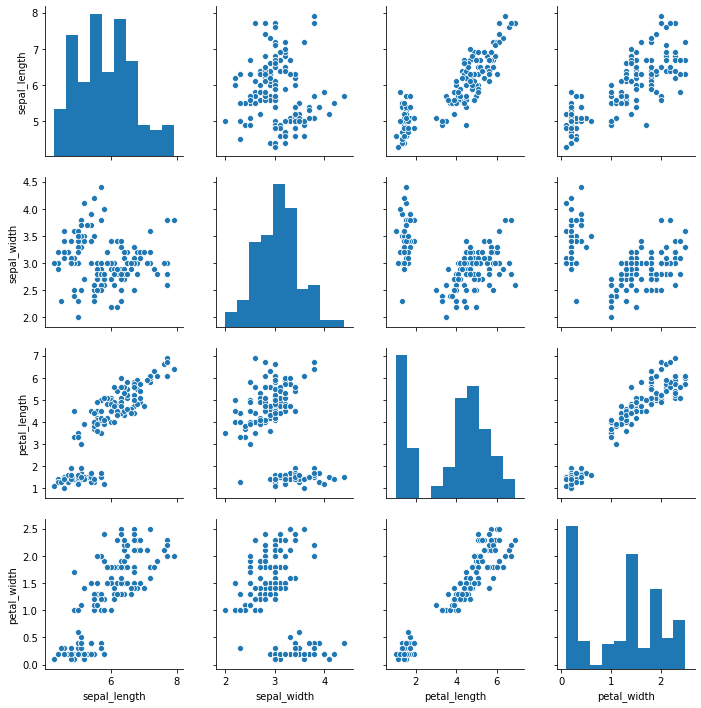

In [104]:
seaborn.pairplot(iris)

Let's build a simple neural network that classifies each sample in these 3 classes:

In [107]:
import tensorflow.keras as keras

# We start by defining the inputs to the network (in this case, the four features)
iris_inputs = keras.layers.Input((4,), dtype=np.float32)

# And the outputs (three categories)
# Note the softmax: the three values should correspond to a distribution (summing to 1)
output_layer = keras.layers.Dense(3, activation="softmax")
iris_outputs = output_layer(iris_inputs)

model = keras.models.Model(inputs=iris_inputs, outputs=iris_outputs)

And we compile the model by defining a loss function and an optimisation algorithm (in this case Stochastic Gradient Descent):

In [108]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

We can look at a summary of the layers. Right now it is not very interesting, but it's very useful when debugging complex architecture with many layers:

In [109]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


Note the model has 15 parameters, which make sense, since each output node will be connected to the four features (hence 4 weights), plus one bias term. 

Now, in order to train the model, we need to split the data into training, development and test sets:

In [110]:
#We shuffle through the data
iris = iris.sample(frac=1)

# And separate the features from the targets
X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y= iris["species"].map({"setosa":0, "virginica":1, "versicolor":2}).values

# The first 90 samples will be used for training, and the rest will be used for dev (30) and test (30)
X_train, y_train = X[:90], y[:90]
X_dev, y_dev = X[90:120], y[90:120]
X_test, y_test = X[120:], y[120:]

In [111]:
model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=5)

Train on 90 samples, validate on 30 samples
Epoch 1/5
90/90 [==============================] - 0s 4ms/sample - loss: 4.8510 - accuracy: 0.3444 - val_loss: 4.1978 - val_accuracy: 0.3333
Epoch 2/5
90/90 [==============================] - 0s 250us/sample - loss: 4.2829 - accuracy: 0.3444 - val_loss: 3.7667 - val_accuracy: 0.2667
Epoch 3/5
90/90 [==============================] - 0s 219us/sample - loss: 3.8378 - accuracy: 0.3111 - val_loss: 3.3693 - val_accuracy: 0.2667
Epoch 4/5
90/90 [==============================] - 0s 231us/sample - loss: 3.4149 - accuracy: 0.3000 - val_loss: 2.9808 - val_accuracy: 0.2333
Epoch 5/5
90/90 [==============================] - 0s 234us/sample - loss: 2.9980 - accuracy: 0.2889 - val_loss: 2.5881 - val_accuracy: 0.2000


Not too good... However, we are dealing with an extremely small dataset, so we need to increase the learning rate and run on more epochs in order to get good results:

In [112]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=1), 
              metrics=["accuracy"])
model.fit(X_train, y_train, epochs=20, validation_data=(X_dev, y_dev))

Train on 90 samples, validate on 30 samples
Epoch 1/20
90/90 [==============================] - 0s 5ms/sample - loss: 10.6058 - accuracy: 0.2333 - val_loss: 2.1102 - val_accuracy: 0.3000
Epoch 2/20
90/90 [==============================] - 0s 231us/sample - loss: 3.6810 - accuracy: 0.5000 - val_loss: 7.6421 - val_accuracy: 0.3667
Epoch 3/20
90/90 [==============================] - 0s 226us/sample - loss: 5.7194 - accuracy: 0.4667 - val_loss: 0.3304 - val_accuracy: 0.8333
Epoch 4/20
90/90 [==============================] - 0s 217us/sample - loss: 1.4719 - accuracy: 0.7222 - val_loss: 3.1420 - val_accuracy: 0.4667
Epoch 5/20
90/90 [==============================] - 0s 214us/sample - loss: 1.9114 - accuracy: 0.5667 - val_loss: 3.2710 - val_accuracy: 0.3333
Epoch 6/20
90/90 [==============================] - 0s 219us/sample - loss: 1.8094 - accuracy: 0.5111 - val_loss: 1.3553 - val_accuracy: 0.6667
Epoch 7/20
90/90 [==============================] - 0s 224us/sample - loss: 0.9768 - accuracy

We can now compute predictions on the test set:

In [113]:
X_test[:5]

array([[4.4, 3.2, 1.3, 0.2],
       [5. , 2. , 3.5, 1. ],
       [5.7, 2.8, 4.5, 1.3],
       [5.7, 4.4, 1.5, 0.4],
       [7.7, 2.8, 6.7, 2. ]])

In [114]:
predictions = model.predict(X_test)

In [115]:
predictions[:5]

array([[9.9999857e-01, 2.4542074e-13, 1.4871696e-06],
       [4.0861592e-10, 7.2378762e-02, 9.2762125e-01],
       [1.2890141e-12, 3.6160052e-01, 6.3839954e-01],
       [1.0000000e+00, 7.5171858e-17, 8.4541867e-09],
       [5.0513398e-26, 9.9818558e-01, 1.8143895e-03]], dtype=float32)

And we can compute the accuracy:

In [116]:
import sklearn.metrics

best_predictions = predictions.argmax(axis=1)
print("Accuracy on test set:", sklearn.metrics.accuracy_score(y_test, best_predictions))

Accuracy on test set: 0.9666666666666667


Much better!

The current model is a simple logistic regression.  One can also construct a more complex model with one hidden layer (this is just for illustrative purpose - statistically speaking, it doesn't make much sense given the size and dimension of our dataset).

In [117]:

# We start by defining the inputs to the network (in this case, the four features)
iris_inputs = keras.layers.Input((4,))

# And the outputs (three categories)
hidden_layer = keras.layers.Dense(10, activation="relu")

# Note the softmax: the three values should correspond to a distribution (summing to 1)
output_layer = keras.layers.Dense(3, activation="softmax")

iris_outputs = output_layer(hidden_layer(iris_inputs))

model = keras.models.Model(inputs=iris_inputs, outputs=iris_outputs)
model.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.1), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_dev, y_dev))

Train on 90 samples, validate on 30 samples
Epoch 1/10
90/90 [==============================] - 0s 6ms/sample - loss: 1.3990 - accuracy: 0.3222 - val_loss: 1.0873 - val_accuracy: 0.3000
Epoch 2/10
90/90 [==============================] - 0s 218us/sample - loss: 1.1480 - accuracy: 0.3667 - val_loss: 1.0590 - val_accuracy: 0.3667
Epoch 3/10
90/90 [==============================] - 0s 205us/sample - loss: 1.0134 - accuracy: 0.4000 - val_loss: 0.8857 - val_accuracy: 0.7000
Epoch 4/10
90/90 [==============================] - 0s 213us/sample - loss: 0.8575 - accuracy: 0.6778 - val_loss: 0.7987 - val_accuracy: 0.7000
Epoch 5/10
90/90 [==============================] - 0s 217us/sample - loss: 0.7574 - accuracy: 0.6556 - val_loss: 0.6920 - val_accuracy: 0.5667
Epoch 6/10
90/90 [==============================] - 0s 210us/sample - loss: 0.6791 - accuracy: 0.5778 - val_loss: 0.5776 - val_accuracy: 0.7000
Epoch 7/10
90/90 [==============================] - 0s 213us/sample - loss: 0.5777 - accuracy:

We can inspect the history of the training steps:

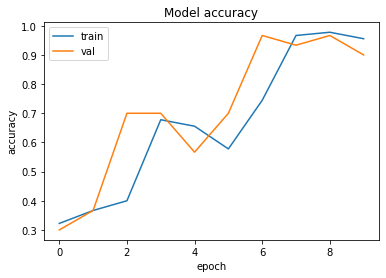

In [119]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()